In [2]:
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
def extract_phase_spectrum(img):
    ft_img = np.fft.fft2(img, img.shape)
    rft_img = ft_img.real
    ift_img = ft_img.imag
    phase = np.arctan2(ift_img, rft_img)
    spectrum = np.sqrt(
        np.add(
            np.power(rft_img,2), 
            np.power(ift_img,2)
        )
    )
    return phase, spectrum

In [4]:
def make_viewable(spectrum, phase):
    viewable_spectrum = 1 + np.log(np.fabs(spectrum) + 1)
    viewable_spectrum = (viewable_spectrum / viewable_spectrum.max()) * 255.0

    viewable_phase = (phase + np.fabs(phase.min()))
    viewable_phase = (viewable_phase / viewable_phase.max()) * 255.0
    return viewable_phase, viewable_spectrum

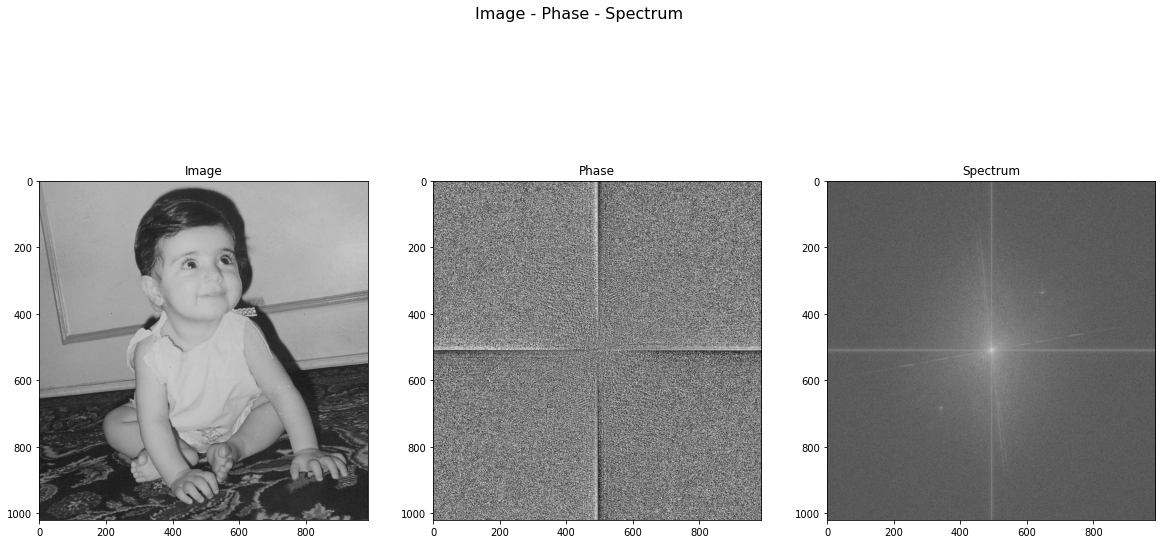

In [31]:
im183 = Image.open("Im183.BMP").convert('L')
im183 = np.array(im183)
for i in range(im183.shape[0]):
    for j in range(im183.shape[1]):
        if (i + j) % 2 != 0:
            im183[i, j] = im183[i, j] * (-1)

phase, spectrum = extract_phase_spectrum(im183)

viewable_phase, viewable_spectrum = make_viewable(spectrum, phase)

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Image - Phase - Spectrum', fontsize=16)

im183 = Image.open("Im183.BMP").convert('L')
im183 = np.array(im183)
axs[0].imshow(im183.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[0].set_title('Image')
axs[1].imshow(viewable_phase.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[1].set_title('Phase')
axs[2].imshow(viewable_spectrum.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[2].set_title('Spectrum')
plt.show()

In [5]:
def reconstruct_image(phase, spectrum):
    fft_img = np.multiply(spectrum, np.exp(1j*(phase)))
    img = np.fft.ifft2(fft_img).real
    return img

(1020, 987)


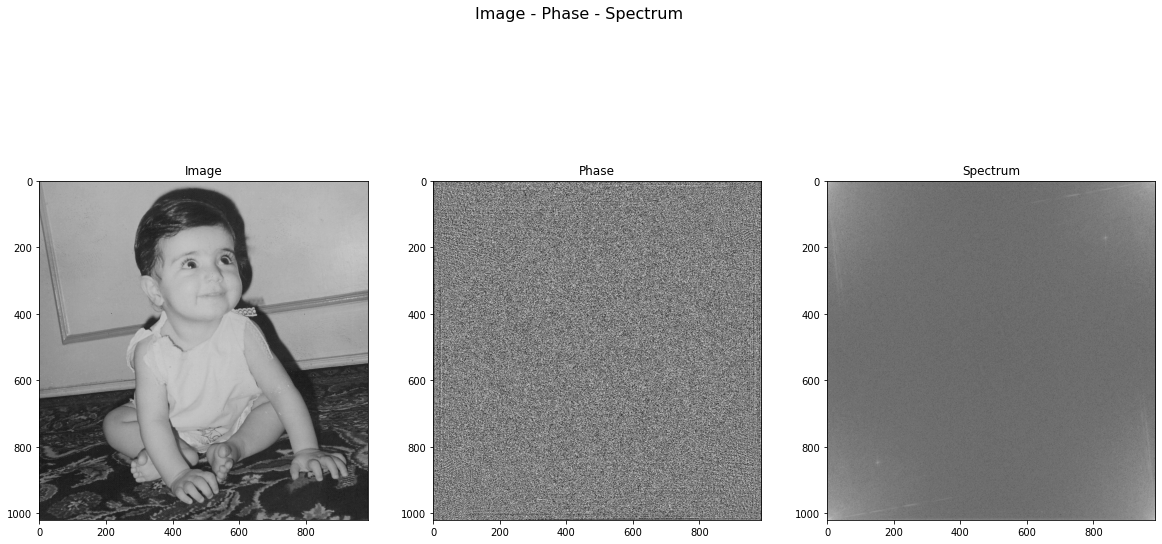

In [64]:
im183 = Image.open("Im183.BMP").convert('L')
im183 = np.array(im183)


phase, spectrum = extract_phase_spectrum(im183)
viewable_phase, viewable_spectrum = make_viewable(spectrum, phase)

fig, axs = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Image - Phase - Spectrum', fontsize=16)

im183 = reconstruct_image(phase, spectrum)
print(im183.shape)


axs[0].imshow(im183.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[0].set_title('Image')
axs[1].imshow(viewable_phase.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[1].set_title('Phase')
axs[2].imshow(viewable_spectrum.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[2].set_title('Spectrum')
plt.show()

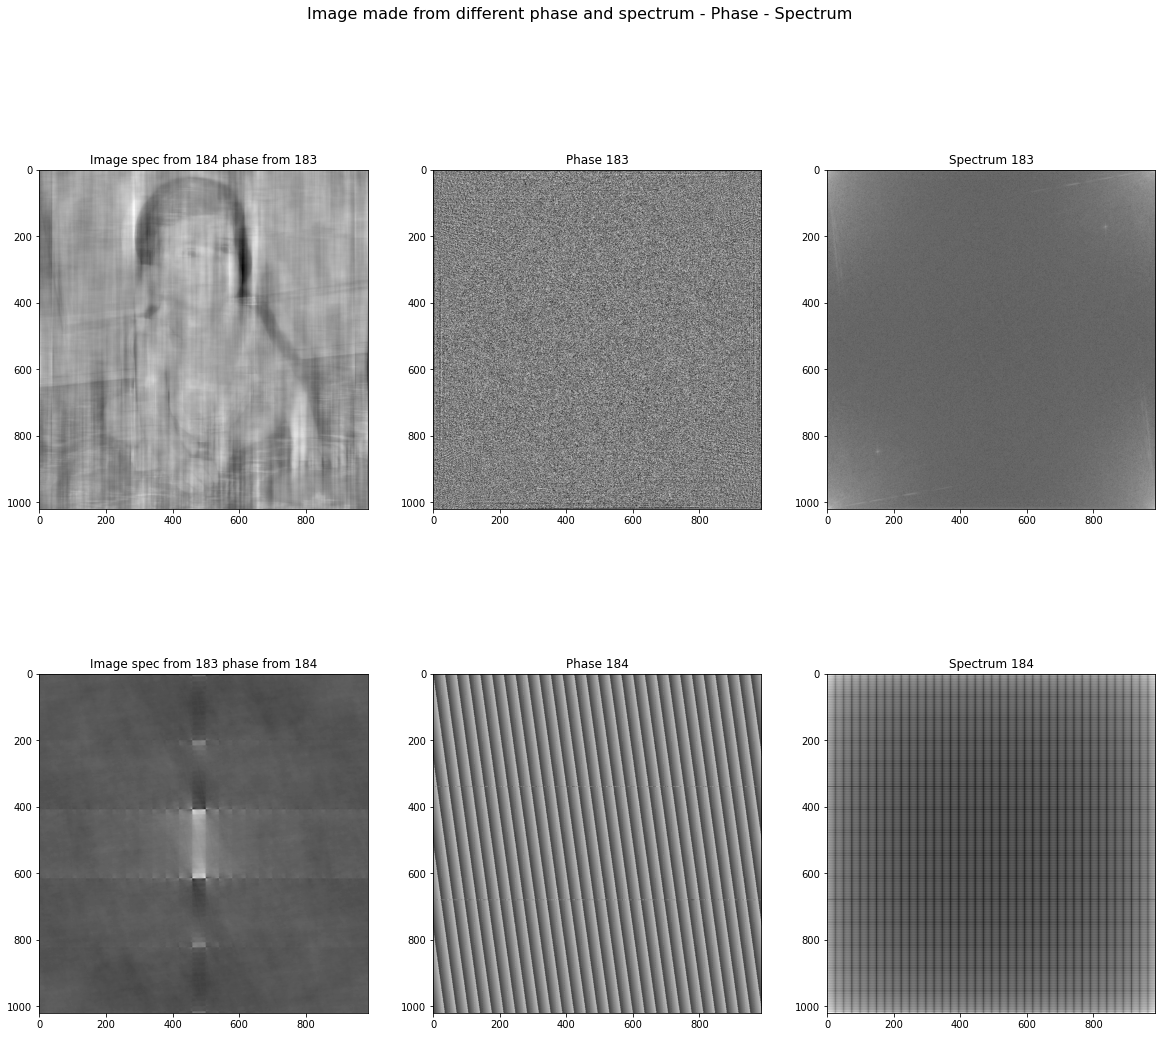

In [70]:
im183 = Image.open("Im183.BMP").convert('L')
im183 = np.array(im183)
im184 = Image.open("Im184.bmp").convert('L')
im184 = np.array(im184)

phase3, spectrum3 = extract_phase_spectrum(im183)
phase4, spectrum4 = extract_phase_spectrum(im184)

viewable_phase3, viewable_spectrum3 = make_viewable(spectrum3, phase3)
viewable_phase4, viewable_spectrum4 = make_viewable(spectrum4, phase4)


im184183 = reconstruct_image(phase4, spectrum3)
im183184 = reconstruct_image(phase3, spectrum4)

fig, axs = plt.subplots(2, 3, figsize=(20, 17))
fig.suptitle('Image made from different phase and spectrum - Phase - Spectrum', fontsize=16)


axs[0][0].imshow(im183184.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[0][0].set_title('Image spec from 184 phase from 183')
axs[0][1].imshow(viewable_phase3.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[0][1].set_title('Phase 183')
axs[0][2].imshow(viewable_spectrum3.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[0][2].set_title('Spectrum 183')
axs[1][0].imshow(im184183.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[1][0].set_title('Image spec from 183 phase from 184')
axs[1][1].imshow(viewable_phase4.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[1][1].set_title('Phase 184')
axs[1][2].imshow(viewable_spectrum4.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[1][2].set_title('Spectrum 184')
plt.show()

In [6]:
def extract_fft_img(img):
    ft_img = np.fft.fft2(img, img.shape)
    return ft_img

In [7]:
def reconstruct_ft_image(ft_image):
    img = np.fft.ifft2(ft_image).real
    return img

In [8]:
def calc_distance(u, v, p, q):
    return np.sqrt(
        np.add(
            np.power((u - p / 2),2), 
            np.power((v - q / 2),2)
        )
    )

In [9]:
def gen_glf(p, q, _d=10):
    d = np.zeros((p, q))
    for i in range(p):
        for j in range(q):
            d[i, j] = calc_distance(i, j, p, q)
    d = np.power(d, 2)
    return np.exp(
        ((-1 * d)) / (2 * np.power(_d, 2))
    )

In [10]:
def gen_ghf(p, q, _d=10):
    d = np.zeros((p, q))
    for i in range(p):
        for j in range(q):
            d[i, j] = calc_distance(i, j, p, q)
    d = np.power(d, 2)
    return np.exp(
        ((-1 * d)) / (2 * np.power(_d, 2))
    ) + (-1)

In [11]:
def pad_img(img):
    m = img.shape[0]
    n = img.shape[1]
    
    p = 2 * m
    q = 2 * n
    
    return np.pad(img, [(0, p - m), (0, q - n)], mode='constant', constant_values=0), p, q

In [12]:
def apply_H(ft_img, H):
    return np.multiply(ft_img, H)

In [ ]:
im421 = Image.open("Im421.jpg").convert('L')
im421 = np.array(im421)
im423 = Image.open("Im423.jpg").convert('L')
im423 = np.array(im423)

original_size_421 = im421.shape[:]
im421, p1, q1 = pad_img(im421)
for i in range(p1):
    for j in range(q1):
        if (i + j) % 2 != 0:
            im421[i, j] = im421[i, j] * (-1)

original_size_423 = im423.shape[:]
im423, p3, q3 = pad_img(im423)
for i in range(p3):
    for j in range(q3):
        if (i + j) % 2 != 0:
            im423[i, j] = im423[i, j] * (-1)   

            
fig, axs = plt.subplots(20, 1, figsize=(110, 80))
fig.suptitle('GLF', fontsize=16)      

ft_img1 = extract_fft_img(im421)
ft_img3 = extract_fft_img(im423)
for d in range(10, 101, 10):
    H1 = gen_glf(p1, q1, _d=d)
    H3 = gen_glf(p3, q3, _d=d)
    res1 = apply_H(ft_img1, H1)
    res1 = reconstruct_ft_image(res1)
    res3 = apply_H(ft_img3, H3)
    res3 = reconstruct_ft_image(res3)
    for i in range(p3):
        for j in range(q3):
            if (i + j) % 2 != 0:
                res3[i, j] = res3[i, j] * (-1)
    for i in range(p1):
        for j in range(q1):
            if (i + j) % 2 != 0:
                res1[i, j] = res1[i, j] * (-1)
    res1 = res1[:original_size_421[0] , :original_size_421[1]]
    res3 = res3[:original_size_423[0] , :original_size_423[1]]
    axs[(d // 10 - 1) * 2].imshow(res1.astype(np.int32), cmap=plt.get_cmap('gray'))
    axs[(d // 10 - 1) * 2].set_title('421 D0 = ' + str(d))   
    axs[(d // 10 - 1) * 2 + 1].imshow(res3.astype(np.int32), cmap=plt.get_cmap('gray'))
    axs[(d // 10 - 1) * 2 + 1].set_title('423 D0 = ' + str(d)) 

plt.show()

Showin differences

In [ ]:
im421 = Image.open("Im421.jpg").convert('L')
im421 = np.array(im421)
im423 = Image.open("Im423.jpg").convert('L')
im423 = np.array(im423)

original_size_421 = im421.shape[:]
im421, p1, q1 = pad_img(im421)
for i in range(p1):
    for j in range(q1):
        if (i + j) % 2 != 0:
            im421[i, j] = im421[i, j] * (-1)

original_size_423 = im423.shape[:]
im423, p3, q3 = pad_img(im423)
for i in range(p3):
    for j in range(q3):
        if (i + j) % 2 != 0:
            im423[i, j] = im423[i, j] * (-1)   


ft_img1 = extract_fft_img(im421)
ft_img3 = extract_fft_img(im423)
for d in range(10, 101, 10):
    fig, axs = plt.subplots(1, 2, figsize=(110, 80))
    fig.suptitle('GLF Spatial Diff', fontsize=24) 
    H1 = gen_glf(p1, q1, _d=d)
    H3 = gen_glf(p3, q3, _d=d)
    res1 = apply_H(ft_img1, H1)
    res1 = reconstruct_ft_image(res1)
    res3 = apply_H(ft_img3, H3)
    res3 = reconstruct_ft_image(res3)
    for i in range(p3):
        for j in range(q3):
            if (i + j) % 2 != 0:
                res3[i, j] = res3[i, j] * (-1)
    for i in range(p1):
        for j in range(q1):
            if (i + j) % 2 != 0:
                res1[i, j] = res1[i, j] * (-1)
    diff1 = im421 - res1
    diff3 = im423 - res3
    diff1 = diff1[:original_size_421[0] , :original_size_421[1]]
    diff3 = diff3[:original_size_423[0] , :original_size_423[1]]
    axs[0].imshow(diff1.astype(np.int32), cmap=plt.get_cmap('gray'))
    axs[0].set_title('Spatial Diff 421 D0 = ' + str(d), fontsize=24)   
    axs[1].imshow(diff3.astype(np.int32), cmap=plt.get_cmap('gray'))
    axs[1].set_title('Spatial Diff 423 D0 = ' + str(d), fontsize=24) 
    plt.savefig("spatialdiff-{}.png".format(d), , bbox_inches='tight')

plt.show()

In [ ]:
im421 = Image.open("Im421.jpg").convert('L')
im421 = np.array(im421)
im423 = Image.open("Im423.jpg").convert('L')
im423 = np.array(im423)

original_size_421 = im421.shape[:]
im421, p1, q1 = pad_img(im421)
for i in range(p1):
    for j in range(q1):
        if (i + j) % 2 != 0:
            im421[i, j] = im421[i, j] * (-1)

original_size_423 = im423.shape[:]
im423, p3, q3 = pad_img(im423)
for i in range(p3):
    for j in range(q3):
        if (i + j) % 2 != 0:
            im423[i, j] = im423[i, j] * (-1)   

            
fig, axs = plt.subplots(20, 2, figsize=(50, 85))
fig.suptitle('GLF', fontsize=16)      

ft_img1 = extract_fft_img(im421)
ft_img3 = extract_fft_img(im423)
for d in range(10, 101, 10):
    fig, axs = plt.subplots(2, 2, figsize=(50, 85))
    fig.suptitle('GLF Diff Freq', fontsize=16)      
    H1 = gen_glf(p1, q1, _d=d)
    H3 = gen_glf(p3, q3, _d=d)
    res1 = apply_H(ft_img1, H1)
    res1 = reconstruct_ft_image(res1)
    res3 = apply_H(ft_img3, H3)
    res3 = reconstruct_ft_image(res3)
    phase1, spectrum1 = extract_phase_spectrum(im421)
    phaser1, spectrumr1 = extract_phase_spectrum(res1)
    viewable_phase1, viewable_spectrum1 = make_viewable(spectrum1 - spectrumr1, phase1 - phaser1)
    
    phase3, spectrum3 = extract_phase_spectrum(im423)
    phaser3, spectrumr3 = extract_phase_spectrum(res3)
    viewable_phase3, viewable_spectrum3 = make_viewable(spectrum3 - spectrumr3, phase3 - phaser3)

    axs[0][0].imshow(viewable_spectrum1.astype(np.int32), cmap=plt.get_cmap('gray'))
    axs[0][0].set_aspect('equal')
    axs[0][0].set_title('Freq Spectrum Diff 421 D0 = ' + str(d))   
    axs[0][1].imshow(viewable_spectrum3.astype(np.int32), cmap=plt.get_cmap('gray'))
    axs[0][1].set_aspect('equal')
    axs[0][1].set_title('Freq Spectrum diff 423 D0 = ' + str(d)) 
    axs[1][0].imshow(viewable_phase1.astype(np.int32), cmap=plt.get_cmap('gray'))
    axs[1][0].set_title('Freq Phase Diff 421 D0 = ' + str(d))   
    axs[1][1].imshow(viewable_phase3.astype(np.int32), cmap=plt.get_cmap('gray'))
    axs[1][1].set_title('Freq Phase Diff 423 D0 = ' + str(d)) 
    axs[1][0].set_aspect('equal')
    axs[1][1].set_aspect('equal')
    plt.savefig("freqdiff-{}.png".format(d), bbox_inches='tight')


plt.tight_layout()
plt.show()

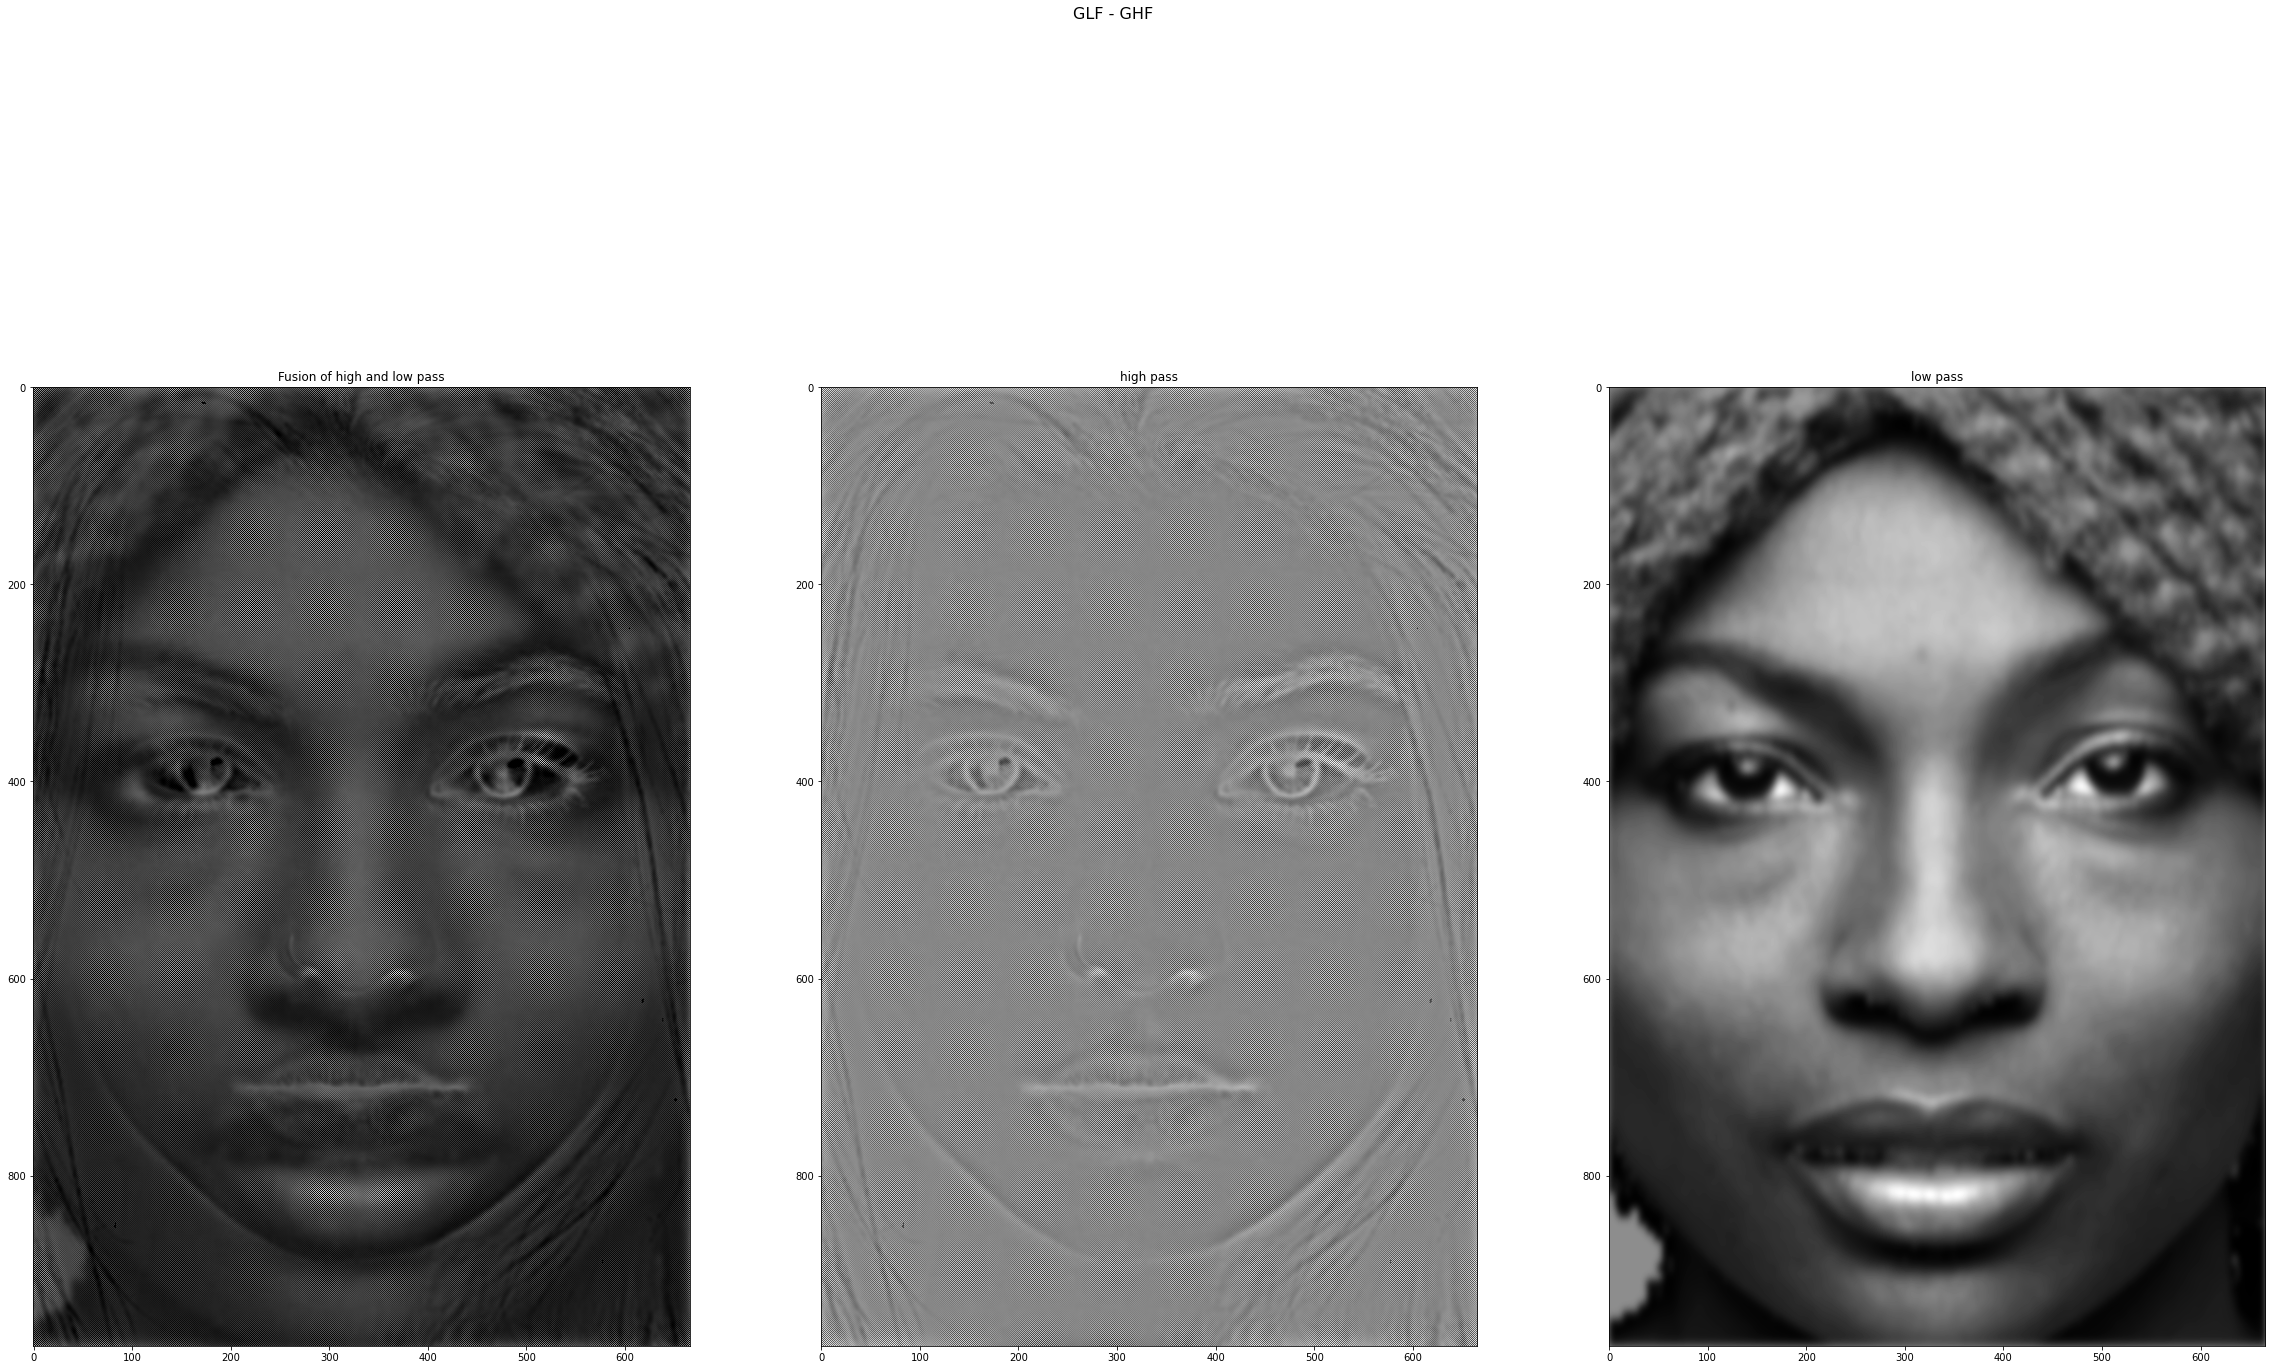

In [46]:
sk = Image.open("face1f.png").convert('L')
sk = np.array(sk)
pr = Image.open("face2f.png").convert('L')
pr = np.array(pr)

original_size_sk = sk.shape[:]
sk, p1, q1 = pad_img(sk)
for i in range(p1):
    for j in range(q1):
        if (i + j) % 2 != 0:
            sk[i, j] = sk[i, j] * (-1)

original_size_pr = pr.shape[:]
pr, p3, q3 = pad_img(pr)
for i in range(p3):
    for j in range(q3):
        if (i + j) % 2 != 0:
            pr[i, j] = pr[i, j] * (-1)   

            


highpass = gen_ghf(p3, q3, _d=35)
lowpass = gen_glf(p1, q1, _d=65)

ft_sk = extract_fft_img(sk)
ft_pr = extract_fft_img(pr)

res1 = apply_H(ft_sk, highpass)
res1 = reconstruct_ft_image(res1)
res2 = apply_H(ft_pr, lowpass)
res2 = reconstruct_ft_image(res2)

for i in range(p3):
    for j in range(q3):
        if (i + j) % 2 != 0:
            res2[i, j] = res2[i, j] * (-1)

for i in range(p1):
    for j in range(q1):
        if (i + j) % 2 != 0:
            res1[i, j] = res1[i, j] * (-1)

res1 = res1[:original_size_sk[0] , :original_size_sk[1]]
res2 = res2[:original_size_pr[0] , :original_size_pr[1]]



res = res2 * .65 + res1 * .95
res = np.clip(res, 0, 255)
fig, axs = plt.subplots(1, 3, figsize=(40, 25))
fig.suptitle('GLF - GHF', fontsize=16)      
axs[0].imshow(res.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[0].set_title('Fusion of high and low pass')  

axs[1].imshow(res1.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[1].set_title('high pass') 

axs[2].imshow(res2.astype(np.int32), cmap=plt.get_cmap('gray'))
axs[2].set_title('low pass') 


plt.show()